In [1]:
import sys
sys.path.append('../')

In [2]:
import minitorch
from minitorch.viz import draw_dot

from IPython.display import display, SVG

import torch
import numpy as np

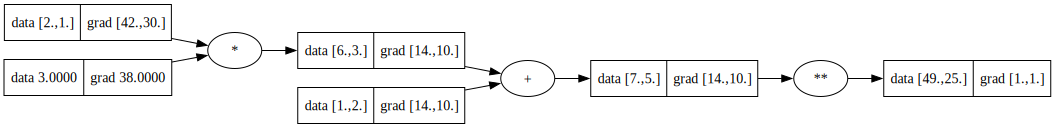

In [3]:
a=minitorch.Tensor([2.0,1.0])
b=minitorch.Tensor([3.0])
c=b*a
d=minitorch.Tensor([1.0,2.0])
e=d+c
f=e**2
f.backward()


# Visualize
dot = draw_dot(f, format='svg')
display(SVG(dot.pipe(format='svg')))

a.data == t_a.data: True
b.data == t_b.data: True
c.data == t_c.data: True
a.grad == t_a.grad: True
b.grad == t_b.grad: True


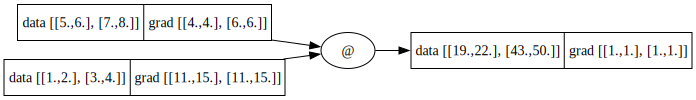

In [4]:
a=minitorch.Tensor([[1.0,2.0],[3.0,4.0]])
b=minitorch.Tensor([[5.0,6.0],[7.0,8.0]])
c = a @ b
# print(c)

t_a = torch.tensor(a.data, requires_grad=True)
t_b = torch.tensor(b.data, requires_grad=True)
t_c = t_a @ t_b
# print(t_c)

print("a.data == t_a.data:", np.allclose(a.data, t_a.data))
print("b.data == t_b.data:", np.allclose(b.data, t_b.data))
print("c.data == t_c.data:", np.allclose(c.data, t_c.data))


c.backward()
# t_c.backward()
t_c.backward(torch.ones_like(t_c))

print("a.grad == t_a.grad:", np.allclose(a.grad, t_a.grad))
print("b.grad == t_b.grad:", np.allclose(b.grad, t_b.grad))

# Visualize
dot = draw_dot(c, format='svg')
display(SVG(dot.pipe(format='svg')))


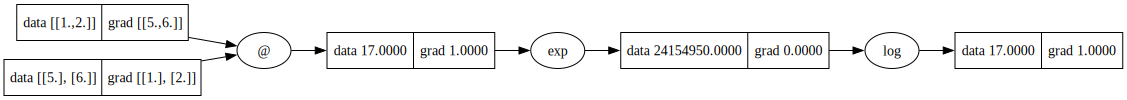

In [ ]:
a=minitorch.Tensor([[1.0,2.0]])
b=minitorch.Tensor([[5.0],[6.0]])
c=a@b
d=minitorch.exp(c)
e=minitorch.log(d)
e.backward()

# Visualize
dot = draw_dot(e, format='svg')
display(SVG(dot.pipe(format='svg')))

d.data == t_d.data: True
a.grad == t_a.grad: True
b.grad == t_b.grad: True


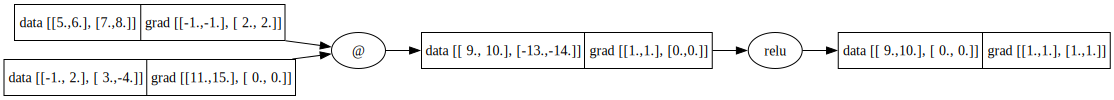

In [6]:
a = minitorch.Tensor([[-1.0, 2.0], [3.0, -4.0]])
b = minitorch.Tensor([[5.0, 6.0], [7.0, 8.0]])
c = a @ b
d = minitorch.relu(c)
d.backward()

# PyTorch comparison
t_a = torch.tensor(a.data, requires_grad=True)
t_b = torch.tensor(b.data, requires_grad=True)
t_c = t_a @ t_b
t_d = torch.relu(t_c)
t_d.backward(torch.ones_like(t_d))

print("d.data == t_d.data:", np.allclose(d.data, t_d.data))
print("a.grad == t_a.grad:", np.allclose(a.grad, t_a.grad))
print("b.grad == t_b.grad:", np.allclose(b.grad, t_b.grad))

# Visualize
dot = draw_dot(d, format='svg')
display(SVG(dot.pipe(format='svg')))

d_sigmoid.data == t_d_sigmoid.data: True
a.grad == t_a.grad: True
b.grad == t_b.grad: True


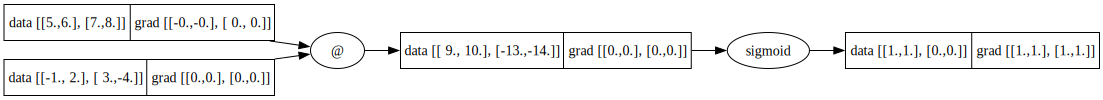

In [7]:
# Sigmoid
a = minitorch.Tensor([[-1.0, 2.0], [3.0, -4.0]])
b = minitorch.Tensor([[5.0, 6.0], [7.0, 8.0]])
c = a @ b
d_sigmoid = minitorch.sigmoid(c)
d_sigmoid.backward()

# PyTorch comparison
t_a = torch.tensor(a.data, requires_grad=True)
t_b = torch.tensor(b.data, requires_grad=True)
t_c = t_a @ t_b
t_d_sigmoid = torch.sigmoid(t_c)
t_d_sigmoid.backward(torch.ones_like(t_d_sigmoid))

print("d_sigmoid.data == t_d_sigmoid.data:", np.allclose(d_sigmoid.data, t_d_sigmoid.data))
print("a.grad == t_a.grad:", np.allclose(a.grad, t_a.grad))
print("b.grad == t_b.grad:", np.allclose(b.grad, t_b.grad))

dot = draw_dot(d_sigmoid, format='svg')
display(SVG(dot.pipe(format='svg')))

d_leaky.data == t_d_leaky.data: True
a.grad == t_a.grad: True
b.grad == t_b.grad: True


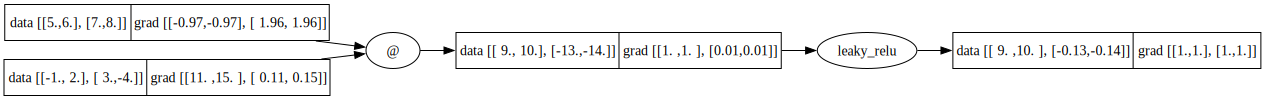

In [8]:
# Leaky ReLU
a = minitorch.Tensor([[-1.0, 2.0], [3.0, -4.0]])
b = minitorch.Tensor([[5.0, 6.0], [7.0, 8.0]])
c = a @ b
d_leaky = minitorch.leaky_relu(c)
d_leaky.backward()

# PyTorch comparison
t_a = torch.tensor(a.data, requires_grad=True)
t_b = torch.tensor(b.data, requires_grad=True)
t_c = t_a @ t_b
t_d_leaky = torch.nn.functional.leaky_relu(t_c)
t_d_leaky.backward(torch.ones_like(t_d_leaky))

print("d_leaky.data == t_d_leaky.data:", np.allclose(d_leaky.data, t_d_leaky.data))
print("a.grad == t_a.grad:", np.allclose(a.grad, t_a.grad))
print("b.grad == t_b.grad:", np.allclose(b.grad, t_b.grad))

dot = draw_dot(d_leaky, format='svg')
display(SVG(dot.pipe(format='svg')))

d_softmax.data == t_d_softmax.data: True
a.grad == t_a.grad: False
b.grad == t_b.grad: False
c.grad == t_c.grad: False


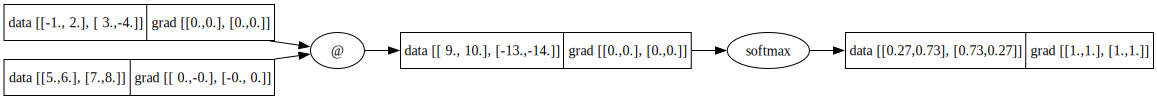

In [20]:
# Softmax
a = minitorch.Tensor([[-1.0, 2.0], [3.0, -4.0]])
b = minitorch.Tensor([[5.0, 6.0], [7.0, 8.0]])
c = a @ b
d_softmax = minitorch.softmax(c)
d_softmax.backward()

# PyTorch comparison
t_a = torch.tensor(a.data, requires_grad=True)
t_b = torch.tensor(b.data, requires_grad=True)
t_c = t_a @ t_b
t_c.retain_grad()
t_d_softmax = torch.nn.functional.softmax(t_c, dim=-1)
t_d_softmax.backward(torch.ones_like(t_d_softmax))

print("d_softmax.data == t_d_softmax.data:", np.allclose(d_softmax.data, t_d_softmax.data))
print("a.grad == t_a.grad:", np.allclose(a.grad, t_a.grad))
print("b.grad == t_b.grad:", np.allclose(b.grad, t_b.grad))
print("c.grad == t_c.grad:", np.allclose(c.grad, t_c.grad))

dot = draw_dot(d_softmax, format='svg')
display(SVG(dot.pipe(format='svg')))

In [24]:
print(a.grad)
print(t_a.grad)

[[8.9406967e-08 1.1920929e-07]
 [7.4505806e-08 1.0430813e-07]]
tensor([[0., 0.],
        [0., 0.]])


In [22]:
print(b.grad)
print(t_b.grad)

[[ 4.4703484e-08 -1.4901161e-08]
 [-5.9604645e-08  2.9802322e-08]]
tensor([[0., 0.],
        [0., 0.]])


In [21]:
print(c.grad)
print(t_c.grad)

[[0.0000000e+00 1.4901161e-08]
 [1.4901161e-08 0.0000000e+00]]
tensor([[0., 0.],
        [0., 0.]])
